<a href="https://colab.research.google.com/github/DonRoboto/MOO_v1/blob/main/T1_P1_P2_EA_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bitstring


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import numpy as np
import random
import bitstring as bits
from sympy import *
import scipy, pylab

In [25]:
class Esfera():
    def Eval(self, X):
        x1 = X[0][0]
        x2 = X[1][0]
        f =  x1**2 + x2**2
        return f


In [26]:
class Schwefel():    
    def Eval(self, X):
        x1 = X[0][0]
        x2 = X[1][0]
        f =  (418.8929 * 2) - ( (x1 * np.sin( np.sqrt(  np.abs(x1)  ) ) )  + (x2 * np.sin( np.sqrt(  np.abs(x2)   ) ))  )
        return f


In [38]:
class Individuo():

    def __init__(self, tipo, rango, x='', y=''):
      self.rango=rango
      if x!='':
        if np.abs(x)>self.rango:
          self.f_x = round(random.uniform(-self.rango, self.rango),2)
        else:
          self.f_x = float(x)

        if np.abs(y)>self.rango:
          self.f_y = round(random.uniform(-self.rango, self.rango),2)
        else:
          self.f_y = float(y)

      else:
        self.f_x = round(random.uniform(-self.rango, self.rango),2)
        self.f_y = round(random.uniform(-self.rango, self.rango),2)
      
      self.cromosomas()

      if tipo=='Esfera':
        self.fx = Esfera()
      if tipo=='Schwefel':
        self.fx = Schwefel()

    def cromosomas(self):
        aux_f_x = bits.BitArray(float=self.f_x, length=32)
        aux_f_y = bits.BitArray(float=self.f_y, length=32)

        self.b_x = list(aux_f_x.bin)
        self.b_y = list(aux_f_y.bin)
 

    def fittnes(self):
      r1_1 = ''.join(self.b_x)
      r1_2 = ''.join(self.b_y)

      r2_1 = bits.BitArray(bin=r1_1).float
      r2_2 = bits.BitArray(bin=r1_2).float

      if np.abs(r2_1)>self.rango  or np.abs(r2_2)>self.rango :
        result = 10000000
      else:
        result = self.fx.Eval(np.array([[r2_1], [r2_2]]))

      return result


In [39]:
class Poblacion():
  p = []

  def __init__(self, tipo, rango, n=''):
    self.p = []
    self.tipo = tipo
    self.rango = rango
    if n!='':
      for k in range(n):
        i=Individuo(tipo=self.tipo, rango=self.rango)
        self.p.append(i)


  def cruza(self, ind_1, ind_2):
    cro1_1 = ind_1.b_x
    cro1_2 = ind_1.b_y

    cro2_1 = ind_2.b_x
    cro2_2 = ind_2.b_y

    cruza1_x_top = cro1_1[:16]
    cruza1_x_bot = cro1_1[16:]

    cruza1_y_top = cro1_2[:16]
    cruza1_y_bot = cro1_2[16:]

    cruza2_x_top = cro2_1[:16]
    cruza2_x_bot = cro2_1[16:]

    cruza2_y_top = cro2_2[:16]
    cruza2_y_bot = cro2_2[16:]

    hijo_1_x = cruza1_x_top + cruza2_x_bot
    hijo_1_y = cruza1_y_top + cruza2_y_bot

    hijo_2_x = cruza2_x_top + cruza1_x_bot
    hijo_2_y = cruza2_y_top + cruza1_y_bot

    ch_1_x = hijo_1_x
    ch_1_y = hijo_1_y

    chs_1_x = ''.join(ch_1_x)
    chs_1_y = ''.join(ch_1_y)

    h1_2_1 = bits.BitArray(bin=chs_1_x)
    h1_2_2 = bits.BitArray(bin=chs_1_y)
      
    h1_3_1 = h1_2_1.float
    h1_3_2 = h1_2_2.float

    ch_2_x = hijo_2_x
    ch_2_y = hijo_2_y

    chs_2_x = ''.join(ch_2_x)
    chs_2_y = ''.join(ch_2_y)

    h2_2_1 = bits.BitArray(bin=chs_2_x)
    h2_2_2 = bits.BitArray(bin=chs_2_y)
      
    h2_3_1 = h2_2_1.float
    h2_3_2 = h2_2_2.float

    hijo_1 = Individuo(tipo=self.tipo, rango=self.rango, x=h1_3_1, y=h1_3_2)
    hijo_2 = Individuo(tipo=self.tipo, rango=self.rango, x=h2_3_1, y=h2_3_2)

    return hijo_1, hijo_2 


  def mutacion(self, ind_1):
    index = random.randint(0, 31)

    c_aux_1 = ind_1.b_x[index]
    c_aux_2 = ind_1.b_y[index]

    if c_aux_1=='0':
      ind_1.b_x[index]='1'
    else:
      ind_1.b_x[index]='0'

    if c_aux_2=='0':
      ind_1.b_y[index]='1'
    else:
      ind_1.b_y[index]='0'



In [52]:
result = np.zeros((10, 200))

for n in range(10):
  pob_i = Poblacion(tipo='Esfera', rango=5.12, n=200)

  for m in range(200):
    pob_n = Poblacion(tipo='Esfera', rango=5.12)
    pob_aux = Poblacion(tipo='Esfera', rango=5.12)


    #seleccionar los que se van a reproducir por torneo binario
    for i in range(0, len(pob_i.p), 2):
      if pob_i.p[i].fittnes()<= pob_i.p[i+1].fittnes():
        pob_aux.p.append(pob_i.p[i])
      else:
        pob_aux.p.append(pob_i.p[i+1])   

    #quenes serán padres
    pad_1 = Individuo(tipo='Esfera', rango=5.12)
    pad_2 = Individuo(tipo='Esfera', rango=5.12)

    for j in range(0, len(pob_aux.p), 2):
      pad_1 = pob_aux.p[j]
      pad_2 = pob_aux.p[j+1]

      pob_n.p.append(pad_1)
      pob_n.p.append(pad_2)

      #cruza
      h_1, h_2 = pob_n.cruza(pad_1, pad_2)

     #mutacion
      if random.uniform(0, 1)<0.1:
        pob_n.mutacion(h_1)

      if random.uniform(0, 1)<0.1:
        pob_n.mutacion(h_2)

      pob_n.p.append(h_1)
      pob_n.p.append(h_2)
  
  j=0  
  for i in pob_n.p:
    result[n][j] = i.fittnes()
    j += 1



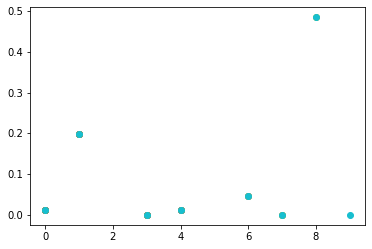

In [53]:
#graficar resultados
ax = pylab.subplot(111)

x=[]
y=[]
for j in range(10):
  x.append(j)
  y.append(np.min(result[j]))

  ax.scatter(x, y)

ax.figure.show()

In [54]:
#solo resultados finales
rf = []
for k in range(10):
  rf.append(np.min(result[k]))

print("mínimo: {}".format(np.nanmin(rf)))
print("máximo: {}".format(np.nanmax(rf)))
print("media: {}".format(np.nanmean(rf)))
print("mediana: {}".format(np.nanmedian(rf)))
print("desviación estándar: {}".format(np.nanstd(rf)))

mínimo: 1.430591936485842e-76
máximo: 0.4849999725818641
media: 0.09420830151271355
mediana: 0.011939727878566926
desviación estándar: 0.16043627460107202


In [55]:
result = np.zeros((10, 200))

for n in range(10):
  pob_i = Poblacion(tipo='Schwefel', rango=500, n=200)

  for m in range(200):
    pob_n = Poblacion(tipo='Schwefel', rango=500)
    pob_aux = Poblacion(tipo='Schwefel', rango=500)


    #seleccionar los que se van a reproducir por torneo binario
    for i in range(0, len(pob_i.p), 2):
      if pob_i.p[i].fittnes()<= pob_i.p[i+1].fittnes():
        pob_aux.p.append(pob_i.p[i])
      else:
        pob_aux.p.append(pob_i.p[i+1])   

    #quenes serán padres
    pad_1 = Individuo(tipo='Schwefel', rango=500)
    pad_2 = Individuo(tipo='Schwefel', rango=500)

    for j in range(0, len(pob_aux.p), 2):
      pad_1 = pob_aux.p[j]
      pad_2 = pob_aux.p[j+1]

      pob_n.p.append(pad_1)
      pob_n.p.append(pad_2)

      #cruza
      h_1, h_2 = pob_n.cruza(pad_1, pad_2)

     #mutacion
      if random.uniform(0, 1)<0.1:
        pob_n.mutacion(h_1)

      if random.uniform(0, 1)<0.1:
        pob_n.mutacion(h_2)

      pob_n.p.append(h_1)
      pob_n.p.append(h_2)
  
  j=0  
  for i in pob_n.p:
    result[n][j] = i.fittnes()
    j += 1


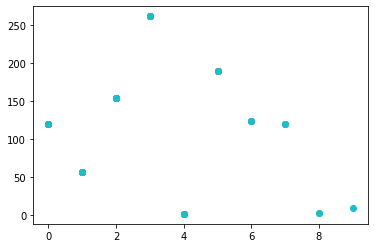

In [56]:
#graficar resultados
ax = pylab.subplot(111)

x=[]
y=[]
for j in range(10):
  x.append(j)
  y.append(np.min(result[j]))

  ax.scatter(x, y)

ax.figure.show()

In [57]:
#solo resultados finales
rf = []
for k in range(10):
  rf.append(np.min(result[k]))

print("mínimo: {}".format(np.nanmin(rf)))
print("máximo: {}".format(np.nanmax(rf)))
print("media: {}".format(np.nanmean(rf)))
print("mediana: {}".format(np.nanmedian(rf)))
print("desviación estándar: {}".format(np.nanstd(rf)))

mínimo: 1.9666231737434146
máximo: 261.44701884045435
media: 104.05299350362274
mediana: 120.1978295015794
desviación estándar: 82.03823678070316
